In [1]:
import os

print("✅ Current Working Directory:", os.getcwd())
print("✅ Files/Folders Here:", os.listdir())


✅ Current Working Directory: c:\Users\Vedant\OneDrive\Desktop\Customer-Churn-Prediction\Customer-Churn-Prediction
✅ Files/Folders Here: ['churn_project.ipynb']


In [2]:
import os

os.makedirs("data", exist_ok=True)
os.makedirs("model", exist_ok=True)
os.makedirs("app", exist_ok=True)

print("✅ Folders created!")
print(os.listdir())


✅ Folders created!
['app', 'churn_project.ipynb', 'data', 'model']


In [3]:
import os
print(os.listdir("data"))


['Telco_Cusomer_Churn.csv']


In [4]:
import os
print(os.listdir("data"))


['Telco_Cusomer_Churn.csv']


In [5]:
import pandas as pd

df = pd.read_csv("data/Telco_Customer_Churn.csv")   # change name if yours is different
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import joblib


In [7]:
print("Shape:", df.shape)
df.info()


Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

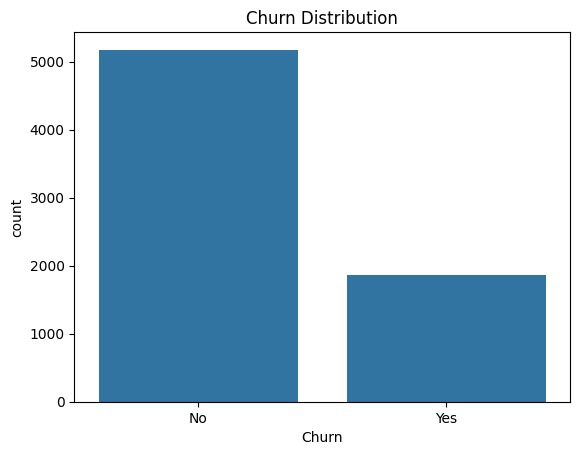

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [8]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

print(df["Churn"].value_counts())


In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


In [10]:
df = df.drop("customerID", axis=1)


In [11]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


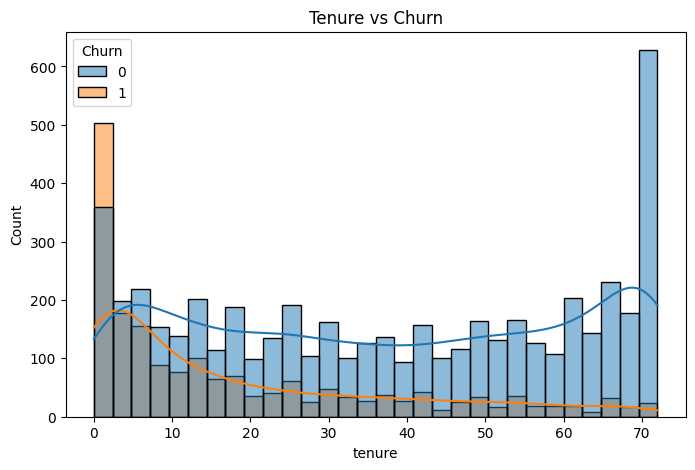

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=True)
plt.title("Tenure vs Churn")
plt.show()


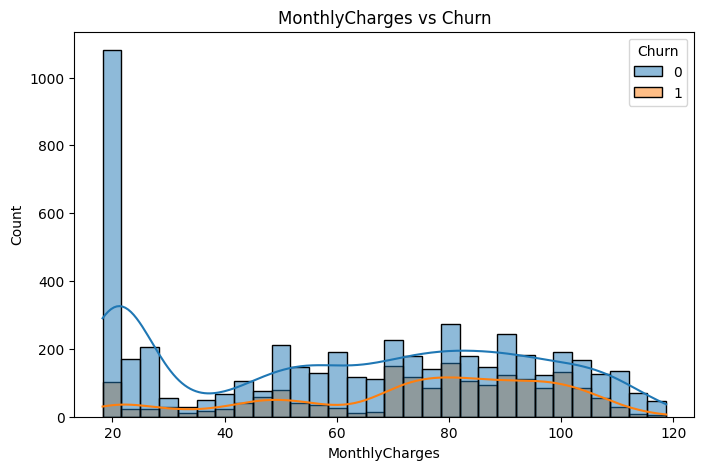

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", bins=30, kde=True)
plt.title("MonthlyCharges vs Churn")
plt.show()


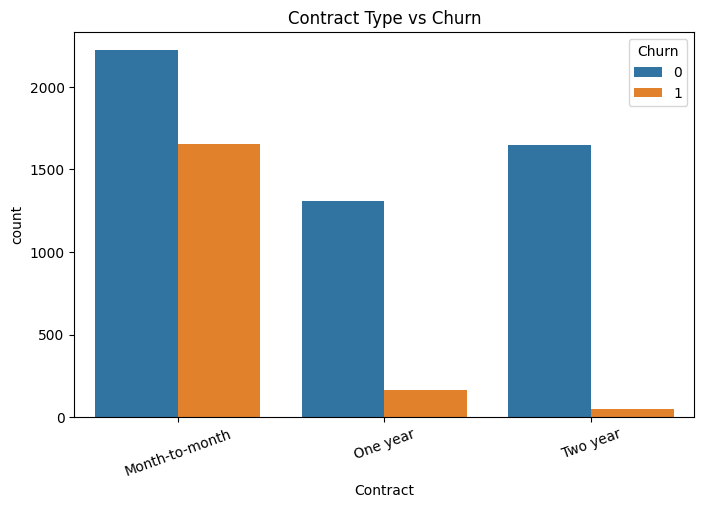

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Contract Type vs Churn")
plt.xticks(rotation=20)
plt.show()


In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [16]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("✅ Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


✅ Logistic Regression
Accuracy: 0.8069552874378992
Recall: 0.5668449197860963
ROC-AUC: 0.8415846443979436


In [19]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("✅ Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


✅ Random Forest
Accuracy: 0.7899219304471257
Recall: 0.4946524064171123
ROC-AUC: 0.826492546952905


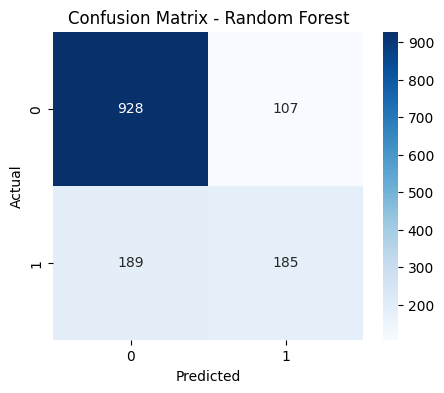

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [20]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred_rf))


In [21]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)


,Feature,Importance
3,TotalCharges,0.194123
1,tenure,0.171364
2,MonthlyCharges,0.167562
10,InternetService_Fiber optic,0.038864
28,PaymentMethod_Electronic check,0.038285
25,Contract_Two year,0.031477
4,gender_Male,0.028519
13,OnlineSecurity_Yes,0.027796
26,PaperlessBilling_Yes,0.025725
5,Partner_Yes,0.023285


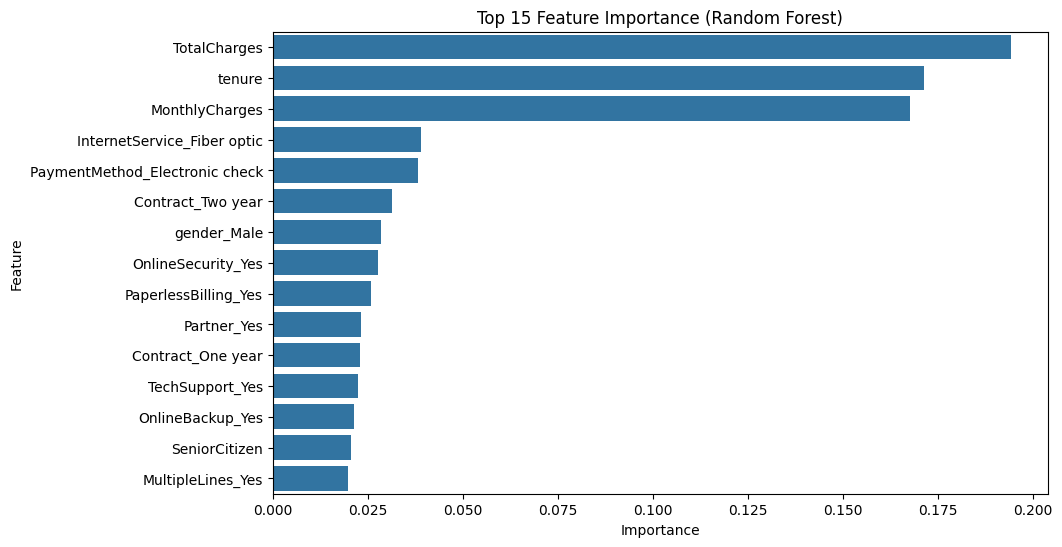

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance.head(15), x="Importance", y="Feature")
plt.title("Top 15 Feature Importance (Random Forest)")
plt.show()


In [23]:
joblib.dump(rf, "model/churn_model.pkl")
joblib.dump(scaler, "model/scaler.pkl")
joblib.dump(X.columns.tolist(), "model/training_columns.pkl")

print("✅ Model saved successfully inside model folder!")


✅ Model saved successfully inside model folder!


In [24]:
import os
print(os.listdir("model"))


['churn_model.pkl', 'scaler.pkl', 'training_columns.pkl']
